## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [55]:
#Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling Import
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import warnings

#### Import the CSV Data as Pandas DataFrame

In [56]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [57]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [58]:
X = df.drop(columns=['math_score'], axis=1)
y = df['math_score']

In [59]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [60]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [61]:
print("Categories in 'gender' variable:     ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:     ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:     ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:     ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:      ['none' 'completed']


In [62]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop="first")

preprocessor = ColumnTransformer(
    transformers=[
        ('StandardScalar', numeric_transformer, num_features),
        ('OneHotEncoder', oh_transformer, cat_features)
    ]
)

In [63]:
X = preprocessor.fit_transform(X)

In [64]:
X

array([[ 0.19399858,  0.39149181,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 1.42747598,  1.31326868,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.60515772,  0.58901542,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [65]:
X.shape

(1000, 14)

In [66]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 14), (200, 14), (800,), (200,))

#### Create an Evaluate Function to give all metrics after model Training

In [67]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    r2 = r2_score(true, predicted)
    return mse, mae, r2

In [68]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "SVR": SVR(),
    "CatBoost": CatBoostRegressor(verbose=False),
    "XGBoost": XGBRegressor()
}
model_list = []
r2_list = []

for i in range(len(models)):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    #Evaluate
    model_train_mse, model_train_mae, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mse, model_test_mae, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(f"Model: {model_name}")
    model_list.append(model_name)

    print("Training: MSE: {:.2f}, MAE: {:.2f}, R2: {:.2f}".format(model_train_mse, model_train_mae, model_train_r2))
    print("-----------------------------------")
    print("Testing: MSE: {:.2f}, MAE: {:.2f}, R2: {:.2f}".format(model_test_mse, model_test_mae, model_test_r2))
    r2_list.append(model_test_r2)
    print("="*50)
    print("\n")

Model: Linear Regression
Training: MSE: 28.33, MAE: 4.27, R2: 0.87
-----------------------------------
Testing: MSE: 29.10, MAE: 4.21, R2: 0.88


Model: Lasso
Training: MSE: 43.48, MAE: 5.21, R2: 0.81
-----------------------------------
Testing: MSE: 42.51, MAE: 5.16, R2: 0.83


Model: Ridge
Training: MSE: 28.34, MAE: 4.26, R2: 0.87
-----------------------------------
Testing: MSE: 29.09, MAE: 4.21, R2: 0.88


Model: K-Nearest Neighbors
Training: MSE: 30.98, MAE: 4.45, R2: 0.86
-----------------------------------
Testing: MSE: 54.43, MAE: 5.71, R2: 0.78


Model: Decision Tree
Training: MSE: 0.08, MAE: 0.02, R2: 1.00
-----------------------------------
Testing: MSE: 65.22, MAE: 6.47, R2: 0.73


Model: Random Forest Regressor
Training: MSE: 5.42, MAE: 1.86, R2: 0.98
-----------------------------------
Testing: MSE: 36.64, MAE: 4.72, R2: 0.85


Model: AdaBoost
Training: MSE: 33.97, MAE: 4.75, R2: 0.85
-----------------------------------
Testing: MSE: 39.25, MAE: 4.87, R2: 0.84


Model: SV

### Results

In [69]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model", "R2 Score"]).sort_values("R2 Score", ascending=False)

,Model,R2 Score
2,Ridge,0.880451
0,Linear Regression,0.880433
8,CatBoost,0.849801
5,Random Forest Regressor,0.849435
6,AdaBoost,0.838709
1,Lasso,0.825320
9,XGBoost,0.820924
3,K-Nearest Neighbors,0.776335
4,Decision Tree,0.731978
7,SVR,0.713014


## Linear Regression

In [70]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"Accuracy of the model: {score:.2f}%")

Accuracy of the model: 88.04%


## Plot y_pred and y_test

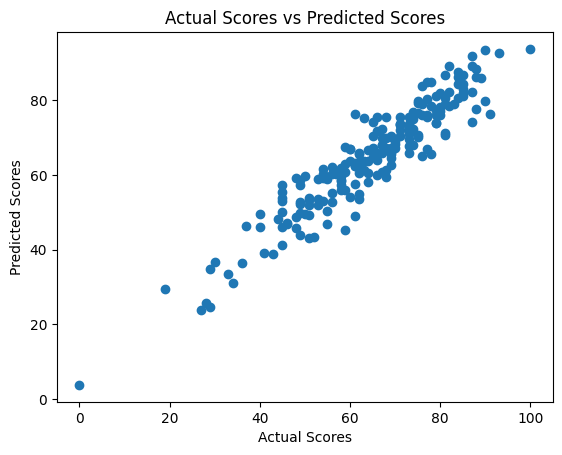

In [71]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual Scores vs Predicted Scores")
plt.show()

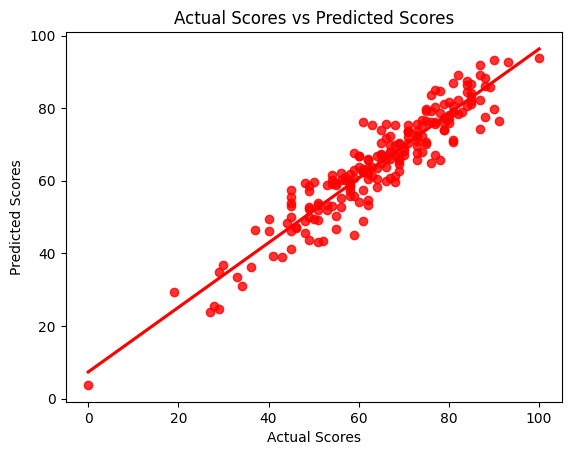

In [72]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="red")
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual Scores vs Predicted Scores")
plt.show()

#### Difference between Actual and Predicted Values

In [73]:
pred_df = pd.DataFrame({"Actual Value": y_test, "Predicted Value": y_pred, "Difference": y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
